# Sudoku solver
## design a sudoku solver to solve sudoku in the for of numpy tensor

### sudoku input = numpy shape (3,3,3,3)

In [101]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime as time

# np.arange(1,82)
#np.swapaxes(np.swapaxes(new_sudoku.reshape([3,3,3,3]),0,2),1,2)

# Generate sudoku

In [102]:
def generate_sudoku(mask_rate=0.7):
    while True:
        n = 9
        m = np.zeros((n, n), np.int)
        rg = np.arange(1, n + 1)
        m[0, :] = np.random.choice(rg, n, replace=False)
        try:
            for r in range(1, n):
                for c in range(n):
                    col_rest = np.setdiff1d(rg, m[:r, c])
                    row_rest = np.setdiff1d(rg, m[r, :c])
                    avb1 = np.intersect1d(col_rest, row_rest)
                    sub_r, sub_c = r//3, c//3
                    avb2 = np.setdiff1d(np.arange(0, n+1), m[sub_r*3:(sub_r+1)*3, sub_c*3:(sub_c+1)*3].ravel())
                    avb = np.intersect1d(avb1, avb2)
                    m[r, c] = np.random.choice(avb, size=1)
            break
        except ValueError:
            pass
    print("Answer:\n", m)
    mm = m.copy()
    mm[np.random.choice([True, False], size=m.shape, p=[mask_rate, 1 - mask_rate])] = 0
    print("\nMasked anwser:\n", mm)
    np.savetxt("./puzzle.csv", mm, "%d", delimiter=",")
    return mm

new_sudoku=generate_sudoku(0.1)

Answer:
 [[7 9 5 3 4 1 8 2 6]
 [2 1 8 7 6 9 3 4 5]
 [3 4 6 5 8 2 7 1 9]
 [8 5 1 9 2 7 6 3 4]
 [6 3 2 1 5 4 9 8 7]
 [9 7 4 6 3 8 1 5 2]
 [4 2 3 8 9 6 5 7 1]
 [5 6 7 4 1 3 2 9 8]
 [1 8 9 2 7 5 4 6 3]]

Masked anwser:
 [[7 9 5 3 4 1 8 2 6]
 [2 1 0 0 0 9 3 4 5]
 [3 4 6 5 0 2 7 1 9]
 [0 5 1 0 2 7 6 3 4]
 [6 3 2 1 5 4 9 8 7]
 [9 0 0 0 3 8 1 5 2]
 [4 2 3 0 9 6 5 7 1]
 [0 6 0 4 1 3 2 9 8]
 [1 8 9 2 7 5 4 6 3]]


## Reshaped into the required format

In [103]:
# framework=np.random.randint(0,10,[3,3,3,3])
framework=np.swapaxes(np.swapaxes(new_sudoku.reshape([3,3,3,3]),0,2),1,2)

#framework=np.arange(27*3,dtype=int).reshape([3,3,3,3])

#framework

## list possiblities for verticle rows

In [104]:
def list_possibilities(framework):
    possiblelist=[]
    for i in range(1,10):
        if (i not in framework.flatten()):
            possiblelist.append(i)
    return possiblelist

def list_verticle_framework(framework):
    verticleposs=[]
    for i in range(3):
        for j in range(3):
            verticleposs.append(list_possibilities(framework[i,:,:,j]))
    return verticleposs

v_poss=list_verticle_framework(framework)

#print(v_poss)

## list possibilties for horizontal rows

In [105]:
#framework[0,0,:,:]

def list_horizontal_framework(framework):
    horizontalposs=[]
    for i in range(3):
        for j in range(3):
            #print (framework[:,i,j,:])
            horizontalposs.append(list_possibilities(framework[:,i,j,:]))
    return horizontalposs

h_poss=list_horizontal_framework(framework)

## list possibilities within the array

In [106]:
def list_box_framework(framework):
    boxposs=[]
    for i in range(3):
        for j in range(3):
            #print (framework[i,j,:,:])
            boxposs.append(list_possibilities(framework[i,j,:,:]))
    return boxposs

b_poss=list_box_framework(framework)

## find positional constant of each element

In [107]:
def generate_positional_array(framework):
    framework_with_positional_element=np.zeros([3,3,3,3,4],dtype=int)
    for indexi,i in enumerate(framework):
        for indexj,j in enumerate(i):
            for indexk,k in enumerate(j):
                for indexl,l in enumerate(k):
                    #print(l,f'vrow is {3*indexi+indexl} hrow is {3*indexj+indexk} box is {3*indexi+indexj}')
                    framework_with_positional_element[indexi,indexj,indexk,indexl]=[l,3*indexi+indexl,3*indexj+indexk,3*indexi+indexj]
    return framework_with_positional_element
        
        
        
        

framework_with_positional_element = generate_positional_array(framework)

In [108]:
def list_all(f,framework,tries):
    count =0
    t0=time.now()
    remaining = 0
    while True:
        for ii,i in enumerate(f):
            for ij,j in enumerate(i):
                for ik,k in enumerate(j):
                    for il,l in enumerate(k):
                        #print(l)
                        if l[0]==0:
                            remaining_possibilities=np.intersect1d(np.intersect1d(v_poss[l[1]],h_poss[l[2]]),b_poss[l[3]])
                            print(remaining_possibilities)
                            if len(remaining_possibilities)==1:
                                print (f'replace index {ii}{ij}{ik}{il} with {remaining_possibilities[0]}')
                                framework[ii,ij,ik,il]=remaining_possibilities[0]
                                f[ii,ij,ik,il,0]=remaining_possibilities[0]
                            elif (len(remaining_possibilities)==0):
                                print('sudoku is not possible')
                                count=tries
                            else:
                                remaining +=1
        count +=1
        if remaining==0:break
        if count>tries:break
    print(f'sudoku complete time taken is {(time.now()-t0).total_seconds()*1000} ms') if remaining ==0 else print (f'sudoku is still not completed after {(time.now()-t0).total_seconds()*1000} ms')
                            

list_all(framework_with_positional_element,framework,5)

[8]
replace index 0012 with 8
[8]
replace index 0100 with 8
[7]
replace index 0121 with 7
[4 7]
[5]
replace index 0210 with 5
[7]
replace index 0212 with 7
[6 7 8]
[6 8]
[8]
replace index 1021 with 8
[9]
replace index 1100 with 9
[6]
replace index 1120 with 6
[8]
replace index 1200 with 8
[4 7]
[6 7 8]
[6 8]
[4 7]
[6 7 8]
[6 8]
[4 7]
[6 7 8]
[6 8]
[4 7]
[6 7 8]
[6 8]
[4 7]
[6 7 8]
[6 8]
sudoku is still not completed after 9.878 ms


In [109]:
#framework
print(framework_with_positional_element)

[[[[[7 0 0 0]
    [9 1 0 0]
    [5 2 0 0]]

   [[2 0 1 0]
    [1 1 1 0]
    [8 2 1 0]]

   [[3 0 2 0]
    [4 1 2 0]
    [6 2 2 0]]]


  [[[8 0 3 1]
    [5 1 3 1]
    [1 2 3 1]]

   [[6 0 4 1]
    [3 1 4 1]
    [2 2 4 1]]

   [[9 0 5 1]
    [7 1 5 1]
    [0 2 5 1]]]


  [[[4 0 6 2]
    [2 1 6 2]
    [3 2 6 2]]

   [[5 0 7 2]
    [6 1 7 2]
    [7 2 7 2]]

   [[1 0 8 2]
    [8 1 8 2]
    [9 2 8 2]]]]



 [[[[3 3 0 3]
    [4 4 0 3]
    [1 5 0 3]]

   [[0 3 1 3]
    [0 4 1 3]
    [9 5 1 3]]

   [[5 3 2 3]
    [8 4 2 3]
    [2 5 2 3]]]


  [[[9 3 3 4]
    [2 4 3 4]
    [7 5 3 4]]

   [[1 3 4 4]
    [5 4 4 4]
    [4 5 4 4]]

   [[6 3 5 4]
    [3 4 5 4]
    [8 5 5 4]]]


  [[[8 3 6 5]
    [9 4 6 5]
    [6 5 6 5]]

   [[4 3 7 5]
    [1 4 7 5]
    [3 5 7 5]]

   [[2 3 8 5]
    [7 4 8 5]
    [5 5 8 5]]]]



 [[[[8 6 0 6]
    [2 7 0 6]
    [6 8 0 6]]

   [[3 6 1 6]
    [4 7 1 6]
    [5 8 1 6]]

   [[7 6 2 6]
    [1 7 2 6]
    [9 8 2 6]]]


  [[[6 6 3 7]
    [3 7 3 7]
    [4 8 3 7]]

   [[9 6 4 7]


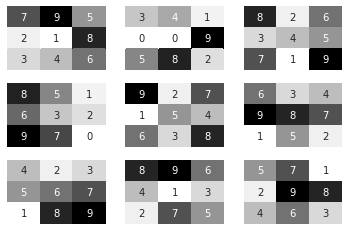

In [110]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df=[]
for i in framework:
    for j in i:
        df.append(pd.DataFrame(j))

fig,axn = plt.subplots(3, 3, sharex=True, sharey=True)

for ax,dfi in zip(np.swapaxes(axn,0,1).flat,df):
    sns.heatmap(dfi,annot=True, ax=ax, cbar=False, cmap='Greys')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)